In [3]:

import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import tensorflow as tf 
print ("Done")

Done


In [4]:
Emotions = pd.read_csv(r'C:\Users\addmin\Downloads\SER_Additional_Experiments_1\emotion_tess_chroma_noaug.csv')

In [5]:
Emotions=Emotions.fillna(0)

In [6]:
Emotions

,0,1,2,3,4,5,6,7,8,9,...,1227,1228,1229,1230,1231,1232,1233,1234,1235,Emotions
0,1.000000,0.271578,0.019846,0.006083,0.004314,0.004789,0.048701,0.349700,0.193753,0.027968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,angry
1,1.000000,0.271578,0.019846,0.006083,0.004314,0.004789,0.048701,0.349700,0.193753,0.027968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,angry
2,1.000000,0.485108,0.064671,0.020852,0.012799,0.009731,0.010650,0.029892,0.016279,0.015059,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,angry
3,1.000000,0.485108,0.064671,0.020852,0.012799,0.009731,0.010650,0.029892,0.016279,0.015059,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,angry
4,0.281098,1.000000,0.460694,0.076041,0.025293,0.014295,0.009325,0.027182,0.292562,0.166902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595,0.756571,0.394956,0.269450,0.194926,0.141831,0.112594,0.121517,0.158713,0.207669,0.366479,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sad
5596,1.000000,0.660635,0.135471,0.043259,0.028659,0.017671,0.017118,0.019665,0.020865,0.025830,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sad
5597,1.000000,0.660635,0.135471,0.043259,0.028659,0.017671,0.017118,0.019665,0.020865,0.025830,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sad
5598,1.000000,0.946425,0.281853,0.066943,0.034662,0.024259,0.023019,0.027187,0.032387,0.027565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sad


# Data preparation

In [7]:
#taking all rows and all cols without last col for X which include features
#taking last col for Y, which include the emotions


X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [8]:
# As this is a multiclass classification problem onehotencoding our Y
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4480, 1236), (4480, 7), (1120, 1236), (1120, 7))

In [10]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [11]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4480, 1236), (4480, 7), (1120, 1236), (1120, 7))

In [12]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('0603)best_model1_weights.keras', monitor='val_accuracy', save_best_only=True)

In [14]:
early_stop=EarlyStopping(monitor='val_accuracy',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

# CNN model

In [16]:
#Reshape for CNN_LSTM MODEL

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((4480, 1236, 1), (4480, 7), (1120, 1236, 1), (1120, 7))

In [17]:
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Channel Attention Layer for 1D
class ChannelAttention(L.Layer):
    def __init__(self, channels, reduction_ratio=16):
        super(ChannelAttention, self).__init__()
        self.channels = channels
        self.reduction_ratio = reduction_ratio
        self.shared_mlp = tf.keras.Sequential([
            L.Dense(channels // reduction_ratio, activation='relu', kernel_initializer='he_normal', use_bias=True, bias_initializer='zeros'),
            L.Dense(channels, kernel_initializer='he_normal', use_bias=True, bias_initializer='zeros')
        ])

    def call(self, inputs):
        avg_pool = tf.reduce_mean(inputs, axis=1, keepdims=True)
        max_pool = tf.reduce_max(inputs, axis=1, keepdims=True)
        avg_out = self.shared_mlp(avg_pool)
        max_out = self.shared_mlp(max_pool)
        attention = tf.nn.sigmoid(avg_out + max_out)
        return inputs * attention

# Spatial Attention Layer for 1D
class SpatialAttention(L.Layer):
    def __init__(self):
        super(SpatialAttention, self).__init__()
        self.conv = L.Conv1D(1, kernel_size=7, padding='same', activation='sigmoid', kernel_initializer='he_normal', use_bias=False)

    def call(self, inputs):
        avg_pool = tf.reduce_mean(inputs, axis=-1, keepdims=True)
        max_pool = tf.reduce_max(inputs, axis=-1, keepdims=True)
        concat = tf.concat([avg_pool, max_pool], axis=-1)
        attention = self.conv(concat)
        return inputs * attention

# Define the model
input_shape = (X_train.shape[1], X_train.shape[2])
inputs = tf.keras.Input(shape=input_shape)

# Convolutional layers
x = L.Conv1D(256, kernel_size=7, strides=1, activation='relu', kernel_regularizer=l2(0.001))(inputs)
x = L.BatchNormalization()(x)
x = L.MaxPool1D(pool_size=1, strides=1)(x)

x = L.Conv1D(256, kernel_size=7, strides=1, activation='relu', kernel_regularizer=l2(0.001))(x)
x = L.BatchNormalization()(x)
x = L.MaxPool1D(pool_size=1, strides=1)(x)
x = L.Dropout(0.20)(x)


# Channel Attention
channel_attention = ChannelAttention(channels=x.shape[-1])
x = channel_attention(x)

# Spatial Attention
spatial_attention = SpatialAttention()
x = spatial_attention(x)

# Fully connected layers
x = L.Flatten()(x)
x = L.Dense(64, activation='relu', kernel_regularizer=l2(0.001))(x)
x = L.BatchNormalization()(x)
outputs = L.Dense(7, activation='softmax')(x)

# Create model
model = Model(inputs, outputs)

# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping and learning rate scheduler
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1236, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 1230, 256)      │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1230, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1230, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1224, 256)      │       459,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1224, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1224, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1224, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ channel_attention               │ (None, 1224, 256)      │         8,464 │
│ (ChannelAttention)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_attention               │ (None, 1224, 256)      │            14 │
│ (SpatialAttention)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 313344)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │    20,054,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,526,373 (78.30 MB)

 Trainable params: 20,525,221 (78.30 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [18]:
history=model.fit(x_traincnn, y_train, validation_data=(x_testcnn, y_test), epochs=100, 
          batch_size=16)

Epoch 1/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 47s 161ms/step - accuracy: 0.7973 - loss: 0.9844 - val_accuracy: 0.6455 - val_loss: 1.6705
Epoch 2/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 49s 176ms/step - accuracy: 0.9873 - loss: 0.4411 - val_accuracy: 0.9795 - val_loss: 0.5178
Epoch 3/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 49s 176ms/step - accuracy: 0.9937 - loss: 0.3961 - val_accuracy: 0.9911 - val_loss: 0.3997
Epoch 4/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 50s 178ms/step - accuracy: 0.9977 - loss: 0.3782 - val_accuracy: 0.9929 - val_loss: 0.3882
Epoch 5/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 50s 177ms/step - accuracy: 0.9992 - loss: 0.3689 - val_accuracy: 0.9946 - val_loss: 0.3799
Epoch 6/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 50s 178ms/step - accuracy: 1.0000 - loss: 0.3600 - val_accuracy: 0.9929 - val_loss: 0.3748
Epoch 7/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 50s 178ms/step - accuracy: 1.0000 - loss: 0.3553 - val_accuracy: 0.9946 - val_loss: 0.3682
Epoch 8/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 50s 178ms/step - accuracy: 0.9998 -

In [19]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9939 - loss: 0.0640
Accuracy of our model on test data :  98.92857074737549 %


In [17]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 225ms/step


,Predicted Labels,Actual Labels
0,Surprise,Surprise
1,Happy,Happy
2,Sad,Sad
3,Neutral,Neutral
4,Surprise,Surprise
5,Happy,Happy
6,Angry,Angry
7,Disgust,Disgust
8,Surprise,Surprise
9,Angry,Angry


Some plots of multi_model
______________________________________________


# Evalutation

Results of best model

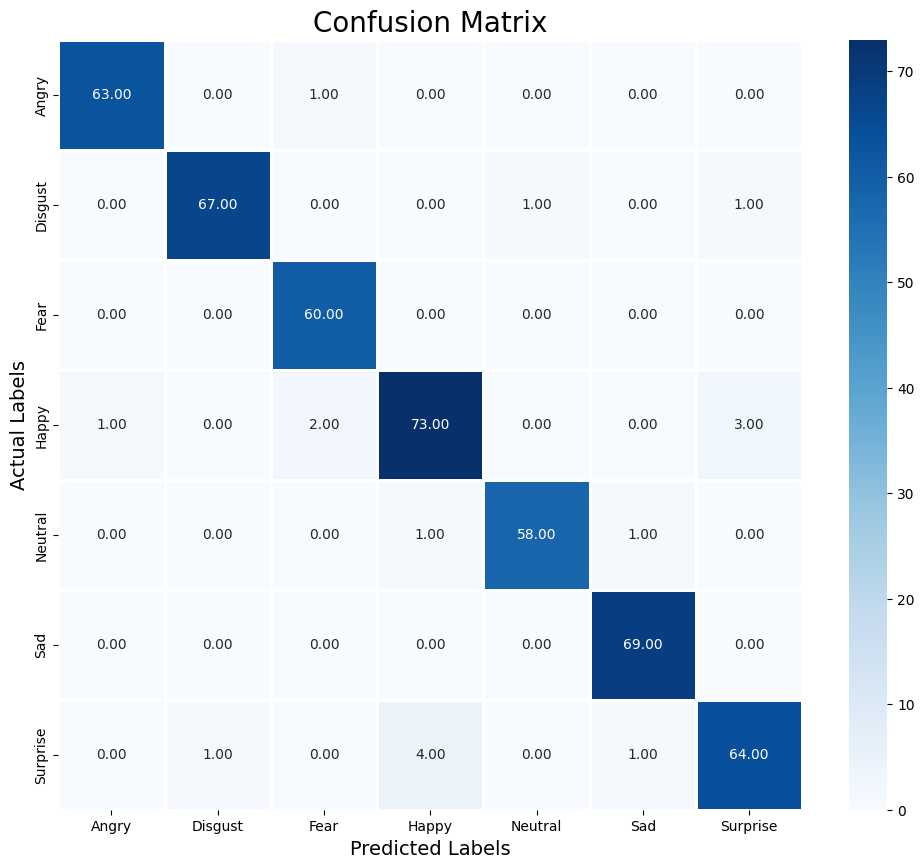

              precision    recall  f1-score   support

       Angry       0.98      0.98      0.98        64
     Disgust       0.99      0.97      0.98        69
        Fear       0.95      1.00      0.98        60
       Happy       0.94      0.92      0.93        79
     Neutral       0.98      0.97      0.97        60
         Sad       0.97      1.00      0.99        69
    Surprise       0.94      0.91      0.93        70

    accuracy                           0.96       471
   macro avg       0.96      0.97      0.97       471
weighted avg       0.96      0.96      0.96       471



In [18]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

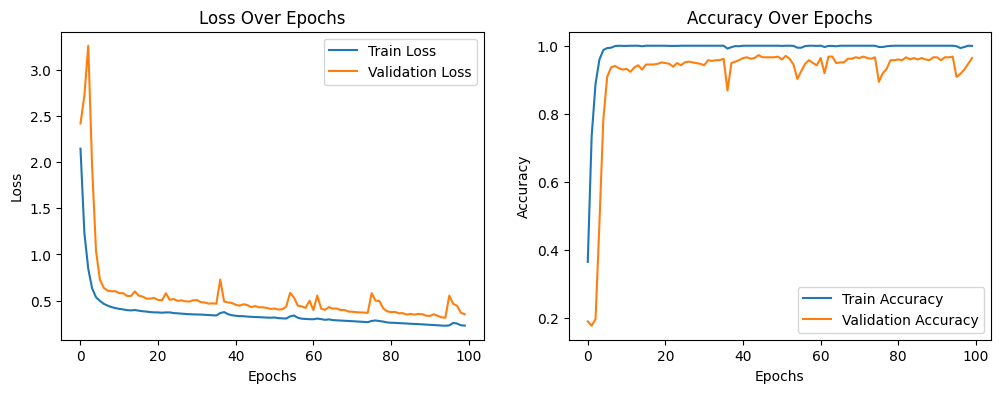

In [19]:
import matplotlib.pyplot as plt

# 가정: 'history'는 model.fit()의 결과로 얻은 History 객체입니다.
# 예: history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

def plot_history(history):
    # 손실 그래프
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Over Epochs')
    plt.legend()

    # 정확도 그래프
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.legend()

    plt.show()

# history 객체를 사용하여 그래프 출력
plot_history(history)


In [20]:
model.save("emovo_mfcc_augmentation_sa.h5")

In [ ]:
model.save("savee_preprocessed/Results/savee_mfcc_noaugmentation_ca.h5")

ValueError: Unable to synchronously create dataset (name already exists)